In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Additional libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.providers.ibmq import least_busy
from qiskit.tools import job_monitor
from qiskit import execute

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account() 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Run Circuit on Simulator


Total count for 00 and 11 are: {'00': 513, '11': 487}


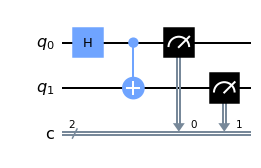

In [2]:
#code taken from https://qiskit.org/documentation/intro_tutorial1.html


# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a quantum circuit with 2 qubits and 2 classical bits
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurements to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()

# Run Circuit on Real Device

In [3]:
# See what providers are available to you
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-internal', group='deployed', project='default')>]

In [10]:
# Get your provider and see which backends are available to you

provider = IBMQ.get_provider('ibm-q-internal') # comment this if you don't have access to internal systems
#provider = IBMQ.get_provider('ibm-q') # publically accessible provider, open-access

for backend in provider.backends():
    print(backend)

ibmq_qasm_simulator
ibmq_armonk
ibmq_montreal
ibmq_toronto
ibmq_bogota
ibmq_kolkata
ibmq_mumbai
ibmq_lima
ibmq_belem
ibmq_quito
ibmq_guadalupe
ibmq_brooklyn
ibmq_jakarta
ibmq_manila
ibm_hanoi
ibm_lagos
ibm_cairo
ibm_auckland
ibm_perth
ibm_washington


In [11]:
# Find which real devices are eligible to run your circuit

eligible_devices = provider.backends(filters=lambda x:x.configuration().n_qubits>1 and not x.configuration().simulator)

for backend in eligible_devices:
    print(backend)

ibmq_montreal
ibmq_toronto
ibmq_bogota
ibmq_kolkata
ibmq_mumbai
ibmq_lima
ibmq_belem
ibmq_quito
ibmq_guadalupe
ibmq_brooklyn
ibmq_jakarta
ibmq_manila
ibm_hanoi
ibm_lagos
ibm_cairo
ibm_auckland
ibm_perth
ibm_washington


In [12]:
# Select the least busy backend

chosen_backend = least_busy(eligible_devices)
print(chosen_backend.name())

ibmq_belem


In [13]:
# Run and monitor the job

compiled_circuit = transpile(circuit, chosen_backend)
job = chosen_backend.run(compiled_circuit, shots = 1000)
job_monitor(job)

Job Status: job has successfully run


In [14]:
# Check the results

job_id = job.job_id()
retrieved_job = chosen_backend.retrieve_job(job_id)
result = retrieved_job.result()
counts_real = result.get_counts()

# If currently unable to run, can use the following result from real devices

# counts_real = {'00': 476, '01': 15, '10': 18, '11': 491} # example result from a real quantum computer

# Print both real and sim results
print("Your job ID is:")
print(job_id)
print()
print("The counts from the real device are:")
print(counts_real)
print()
print("The counts from the simulator are:")
print(counts)

Your job ID is:
628de7980814ba5c06ddd0fc

The counts from the real device are:
{'00': 476, '01': 40, '10': 31, '11': 453}

The counts from the simulator are:
{'00': 513, '11': 487}


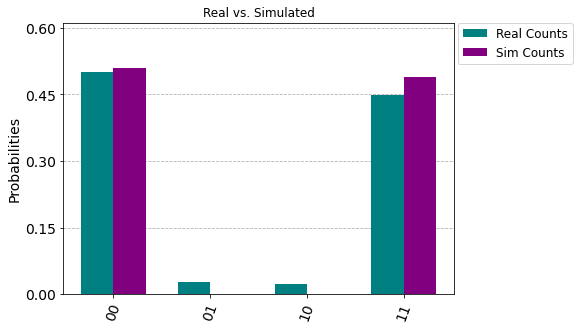

In [16]:
# Plot the results

title = 'Real vs. Simulated'
legend = ['Real Counts', 'Sim Counts']

plot_histogram([counts_real, counts], legend = legend, title = title, color = ['teal', 'purple'], bar_labels = False)

# Hands-On Exercises

Build a circuit that results in the state or logic table provided. You can use the composer or program the circuits here.

*Exercises from Junye Huang*

![](NOT_gate.png)

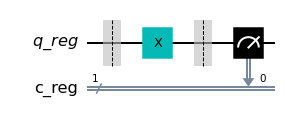

The result when the qubit is initialized in state  0  is: 1


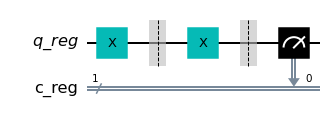

The result when the qubit is initialized in state  1  is: 0


In [22]:
# NOT operation using the simulator

simulator = QasmSimulator()


for i in ['0','1']:
    # Prepare circuit
    qreg = QuantumRegister(1, name = 'q_reg')
    creg = ClassicalRegister(1, name = 'c_reg')
    not_circ = QuantumCircuit(qreg,creg)
    
    # Initialize qubit state
    if i == '1':
        not_circ.x(0) 
    not_circ.barrier()
    
    # Apply NOT operation
    not_circ.x(qreg[0]) # this is where you replace 'which'
    not_circ.barrier()

    # Measure
    not_circ.measure(qreg[0],creg[0])
    
    display(not_circ.draw('mpl'))

    job = simulator.run(not_circ, shots=1000)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(not_circ)

    print('The result when the qubit is initialized in state ', i,' is:', max(counts))


![](XOR_gate.png)

![](AND_gate.png)

![](Bell_state_circ.png)

![](GHZ_state_circ.png)

![](qiskit_logo_circ.png)